In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stock_prices = pd.read_csv('Outputs/stock_data_closings.csv')
stock_prices.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MMM,MRK,MSFT,NKE,TRV,UNH,V,VZ,WBA,WMT
0,173.771469,220.185318,177.348404,200.240005,196.947128,232.630005,53.863472,126.763741,142.970001,56.841930,...,159.266953,78.942360,308.093109,146.496033,162.697205,466.594452,224.472000,50.284931,47.559608,137.646301
1,173.602448,221.678162,181.017258,208.339996,200.650421,232.119995,53.573200,130.103439,144.490005,58.821365,...,160.619583,79.368645,305.893738,146.644440,164.469284,462.487061,230.615524,50.256592,47.550053,138.729279
2,174.825348,221.920502,181.628754,207.520004,200.249786,225.009995,54.347240,130.701904,142.619995,58.678612,...,159.880936,79.455841,310.550049,147.129257,169.100128,473.713287,233.652557,50.823395,48.180870,138.670212
3,171.902313,217.180222,181.510376,206.389999,195.999329,212.770004,53.408722,129.533966,140.029999,58.250370,...,157.703247,76.549278,298.453430,143.765366,168.463776,482.589600,229.801666,50.813950,47.311104,138.808044
4,171.613632,215.309326,183.295532,206.449997,193.869247,219.229996,53.360344,131.155533,142.020004,57.669865,...,154.192108,76.113297,303.099915,143.844513,168.297318,477.060425,226.675323,50.360504,46.450905,137.173737


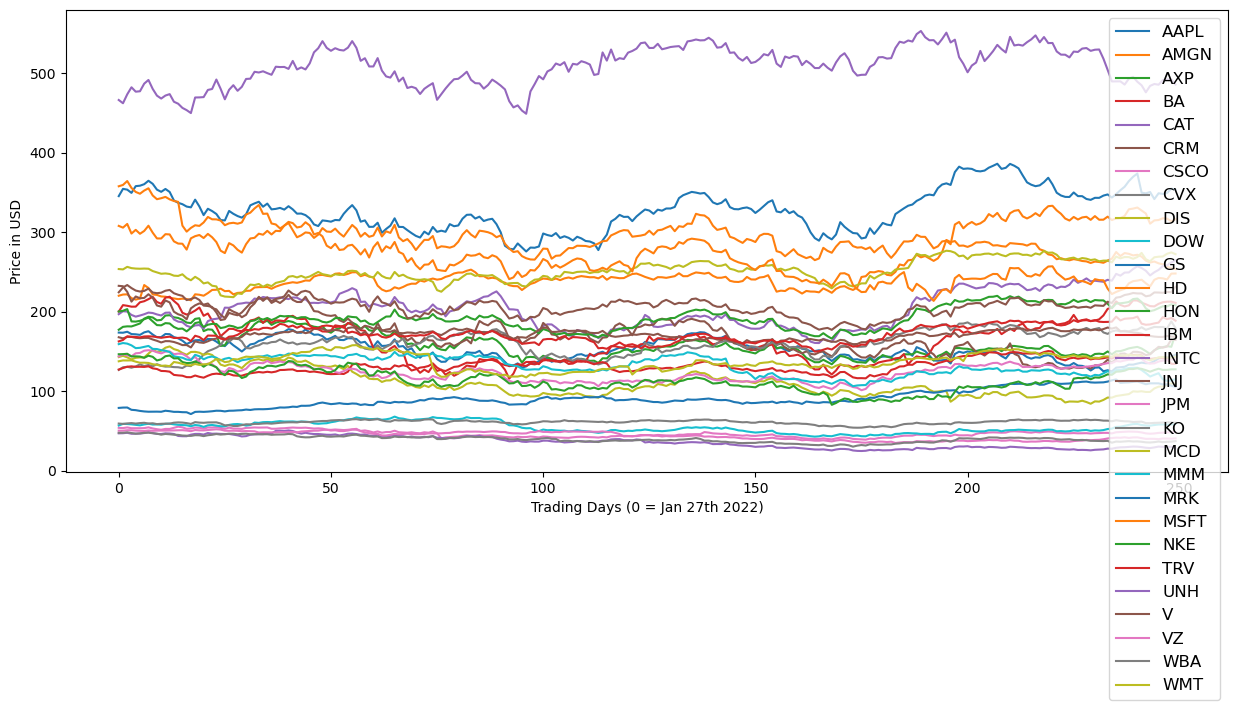

In [3]:
# Visualizing the data
plt.figure(figsize=(15, 6))
for i in range(stock_prices.shape[1]):
    plt.plot(stock_prices.iloc[:,i], label=stock_prices.columns.values[i])
plt.legend(loc='best', fontsize=12)
plt.ylabel('Price in USD')
plt.xlabel("Trading Days (0 = Jan 27th 2022)")

plt.savefig("Outputs/stock_prices.png")

plt.show()

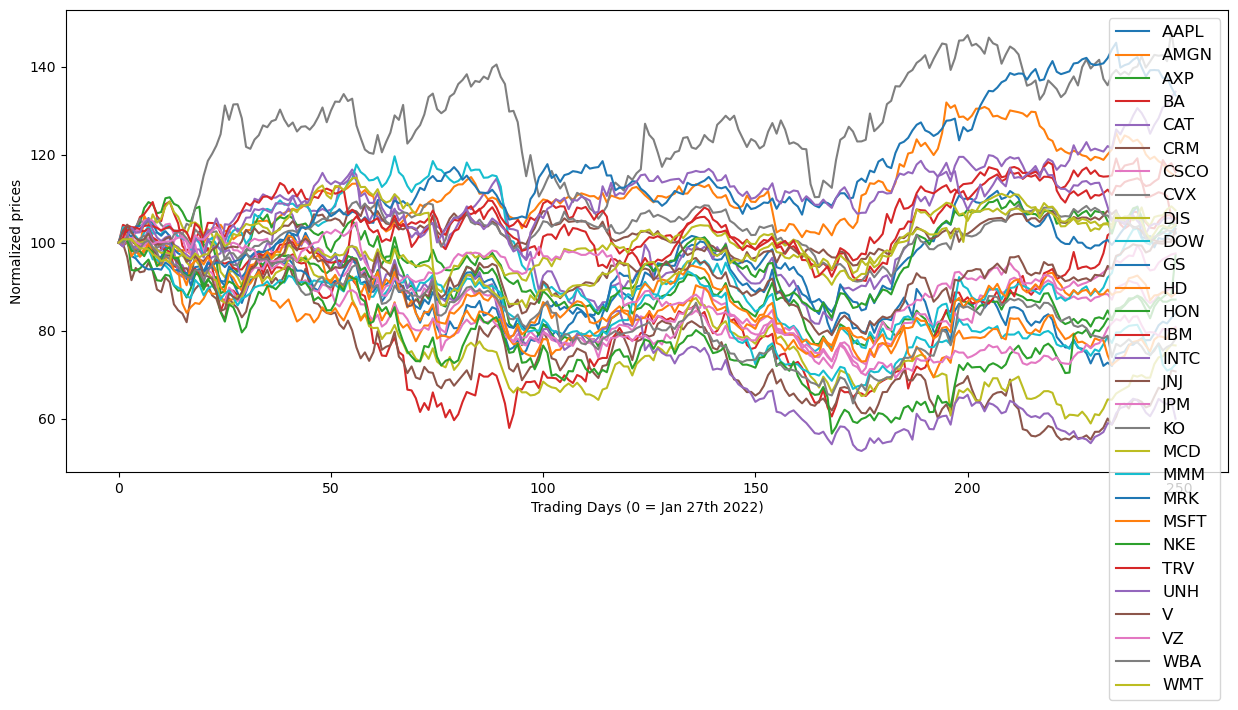

In [4]:
# Normalizing values to Jan 27/2022 (100%)

stock_normalized = stock_prices / (stock_prices.iloc[0]) * 100

plt.figure(figsize=(15, 6))
for i in range(stock_normalized.shape[1]):
    plt.plot(stock_normalized.iloc[:,i], label=stock_normalized.columns.values[i])
plt.legend(loc='best', fontsize=12)
plt.ylabel('Normalized prices')
plt.xlabel("Trading Days (0 = Jan 27th 2022)")

plt.savefig("Outputs/stock_normalized_prices.png")

plt.show()

In [5]:
#Calculate daily percentual change in the value
stock_pct = stock_prices.pct_change()
stock_pct.head()


,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MMM,MRK,MSFT,NKE,TRV,UNH,V,VZ,WBA,WMT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.000973,0.006780,0.020687,0.040451,0.018803,-0.002192,-0.005389,0.026346,0.010632,0.034824,...,0.008493,0.005400,-0.007139,0.001013,0.010892,-0.008803,0.027369,-0.000564,-0.000201,0.007868
2,0.007044,0.001093,0.003378,-0.003936,-0.001997,-0.030631,0.014448,0.004600,-0.012942,-0.002427,...,-0.004599,0.001099,0.015222,0.003306,0.028156,0.024274,0.013169,0.011278,0.013266,-0.000426
3,-0.016720,-0.021360,-0.000652,-0.005445,-0.021226,-0.054398,-0.017269,-0.008936,-0.018160,-0.007298,...,-0.013621,-0.036581,-0.038952,-0.022864,-0.003763,0.018738,-0.016481,-0.000186,-0.018052,0.000994
4,-0.001679,-0.008614,0.009835,0.000291,-0.010868,0.030361,-0.000906,0.012518,0.014211,-0.009966,...,-0.022264,-0.005695,0.015569,0.000551,-0.000988,-0.011457,-0.013605,-0.008924,-0.018182,-0.011774


In [29]:
#Remove nan values at the first row of df2. Create a new dataframe df
stock_pct_clean = stock_pct.iloc[1:len(stock_pct.index),:]

# Calculate annualized average return for each stock. Annualized average return = Daily average return * 252 business days.

annual_return_stocks = stock_pct_clean.mean()*252
annual_return_stocks.sort_values(ascending=False).head()


CVX     0.407378
CAT     0.352928
MRK     0.312876
TRV     0.177172
AMGN    0.167048
dtype: float64

In [7]:
# Create a covariance matrix
stock_covar = stock_pct_clean.cov()
# stock_covar = stock_prices.pct_change().apply(lambda x: np.log(1+x)).cov()
stock_covar.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MMM,MRK,MSFT,NKE,TRV,UNH,V,VZ,WBA,WMT
AAPL,0.000494,0.000092,0.000338,0.000347,0.000211,0.000449,0.000262,0.000153,0.000338,0.000214,...,0.000208,0.000077,0.000404,0.000411,0.000117,0.000161,0.000285,0.000108,0.000237,0.000131
AMGN,0.000092,0.000191,0.000096,0.000058,0.000084,0.000056,0.000080,0.000027,0.000056,0.000076,...,0.000103,0.000076,0.000082,0.000084,0.000074,0.000084,0.000077,0.000067,0.000105,0.000055
AXP,0.000338,0.000096,0.000515,0.000387,0.000262,0.000372,0.000236,0.000116,0.000335,0.000262,...,0.000215,0.000055,0.000323,0.000374,0.000149,0.000139,0.000304,0.000096,0.000231,0.000106
BA,0.000347,0.000058,0.000387,0.000845,0.000305,0.000389,0.000215,0.000149,0.000373,0.000254,...,0.000188,0.000041,0.000321,0.000406,0.000109,0.000117,0.000259,0.000088,0.000233,0.000081
CAT,0.000211,0.000084,0.000262,0.000305,0.000433,0.000226,0.000159,0.000268,0.000226,0.000273,...,0.000187,0.000063,0.000205,0.000287,0.000151,0.000093,0.000193,0.000079,0.000205,0.000071


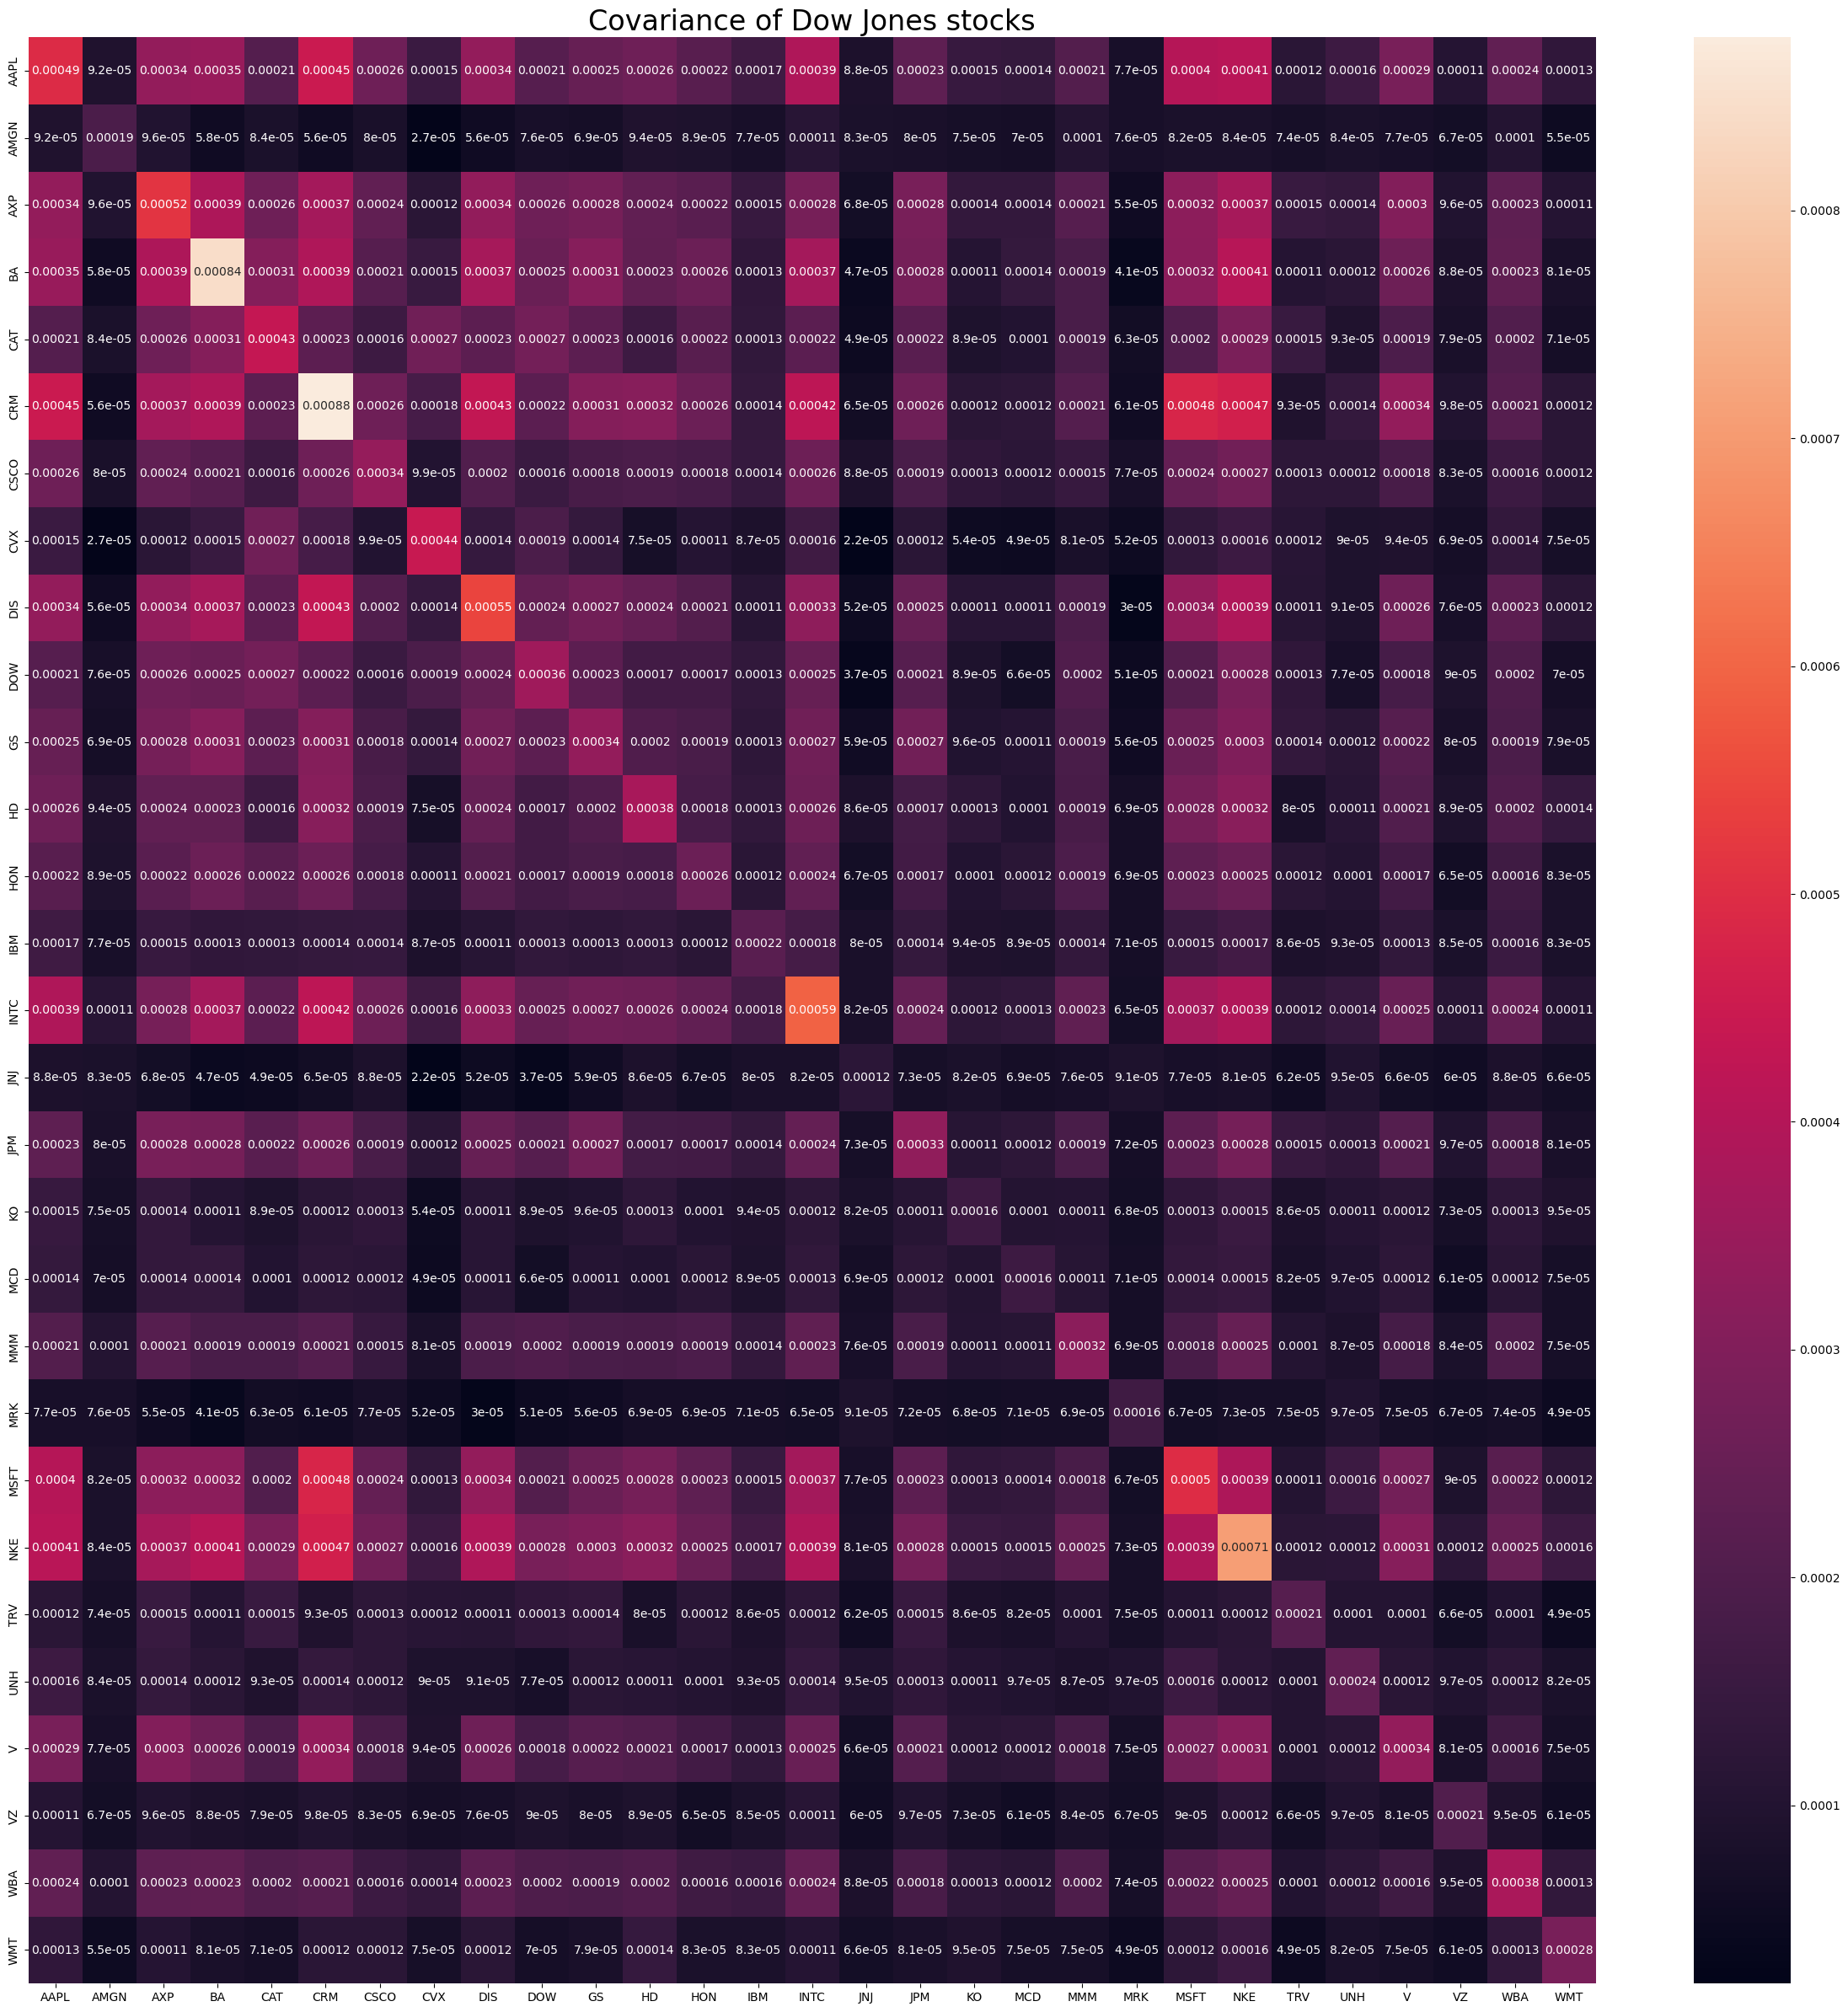

In [8]:
# Heatmap for covariance matrix
plt.figure(figsize=(30, 30))
heatmap_cov = sns.heatmap(stock_covar, annot=True)
heatmap_cov.set_title("Covariance of Dow Jones stocks", fontsize = 24)

# Saving the plot
fig = heatmap_cov.get_figure()
fig.savefig("Outputs/covariance_heatmap.png")

In [9]:
# Create a correlation matrix
stock_corr = stock_pct_clean.corr()
# stock_corr = stock_prices.pct_change().apply(lambda x: np.log(1+x)).corr()
stock_corr.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MMM,MRK,MSFT,NKE,TRV,UNH,V,VZ,WBA,WMT
AAPL,1.000000,0.299332,0.670853,0.537105,0.456115,0.682227,0.641085,0.327259,0.651528,0.506176,...,0.522953,0.270937,0.814679,0.694692,0.360014,0.472022,0.700123,0.338287,0.546756,0.348419
AMGN,0.299332,1.000000,0.304387,0.143672,0.291829,0.137515,0.314616,0.093937,0.173446,0.288528,...,0.416366,0.431261,0.266857,0.228372,0.365684,0.397428,0.302674,0.336841,0.389525,0.233661
AXP,0.670853,0.304387,1.000000,0.586609,0.555082,0.553385,0.564544,0.242744,0.632492,0.607412,...,0.528076,0.190579,0.636835,0.618971,0.450847,0.399168,0.730362,0.294757,0.523231,0.276148
BA,0.537105,0.143672,0.586609,1.000000,0.505385,0.452146,0.401399,0.243882,0.550051,0.459112,...,0.361305,0.111844,0.494672,0.525052,0.255719,0.262072,0.485600,0.211802,0.412080,0.165221
CAT,0.456115,0.291829,0.555082,0.505385,1.000000,0.367141,0.414731,0.613480,0.465330,0.691065,...,0.501995,0.238855,0.441261,0.519209,0.497947,0.290633,0.506879,0.266704,0.506016,0.203544


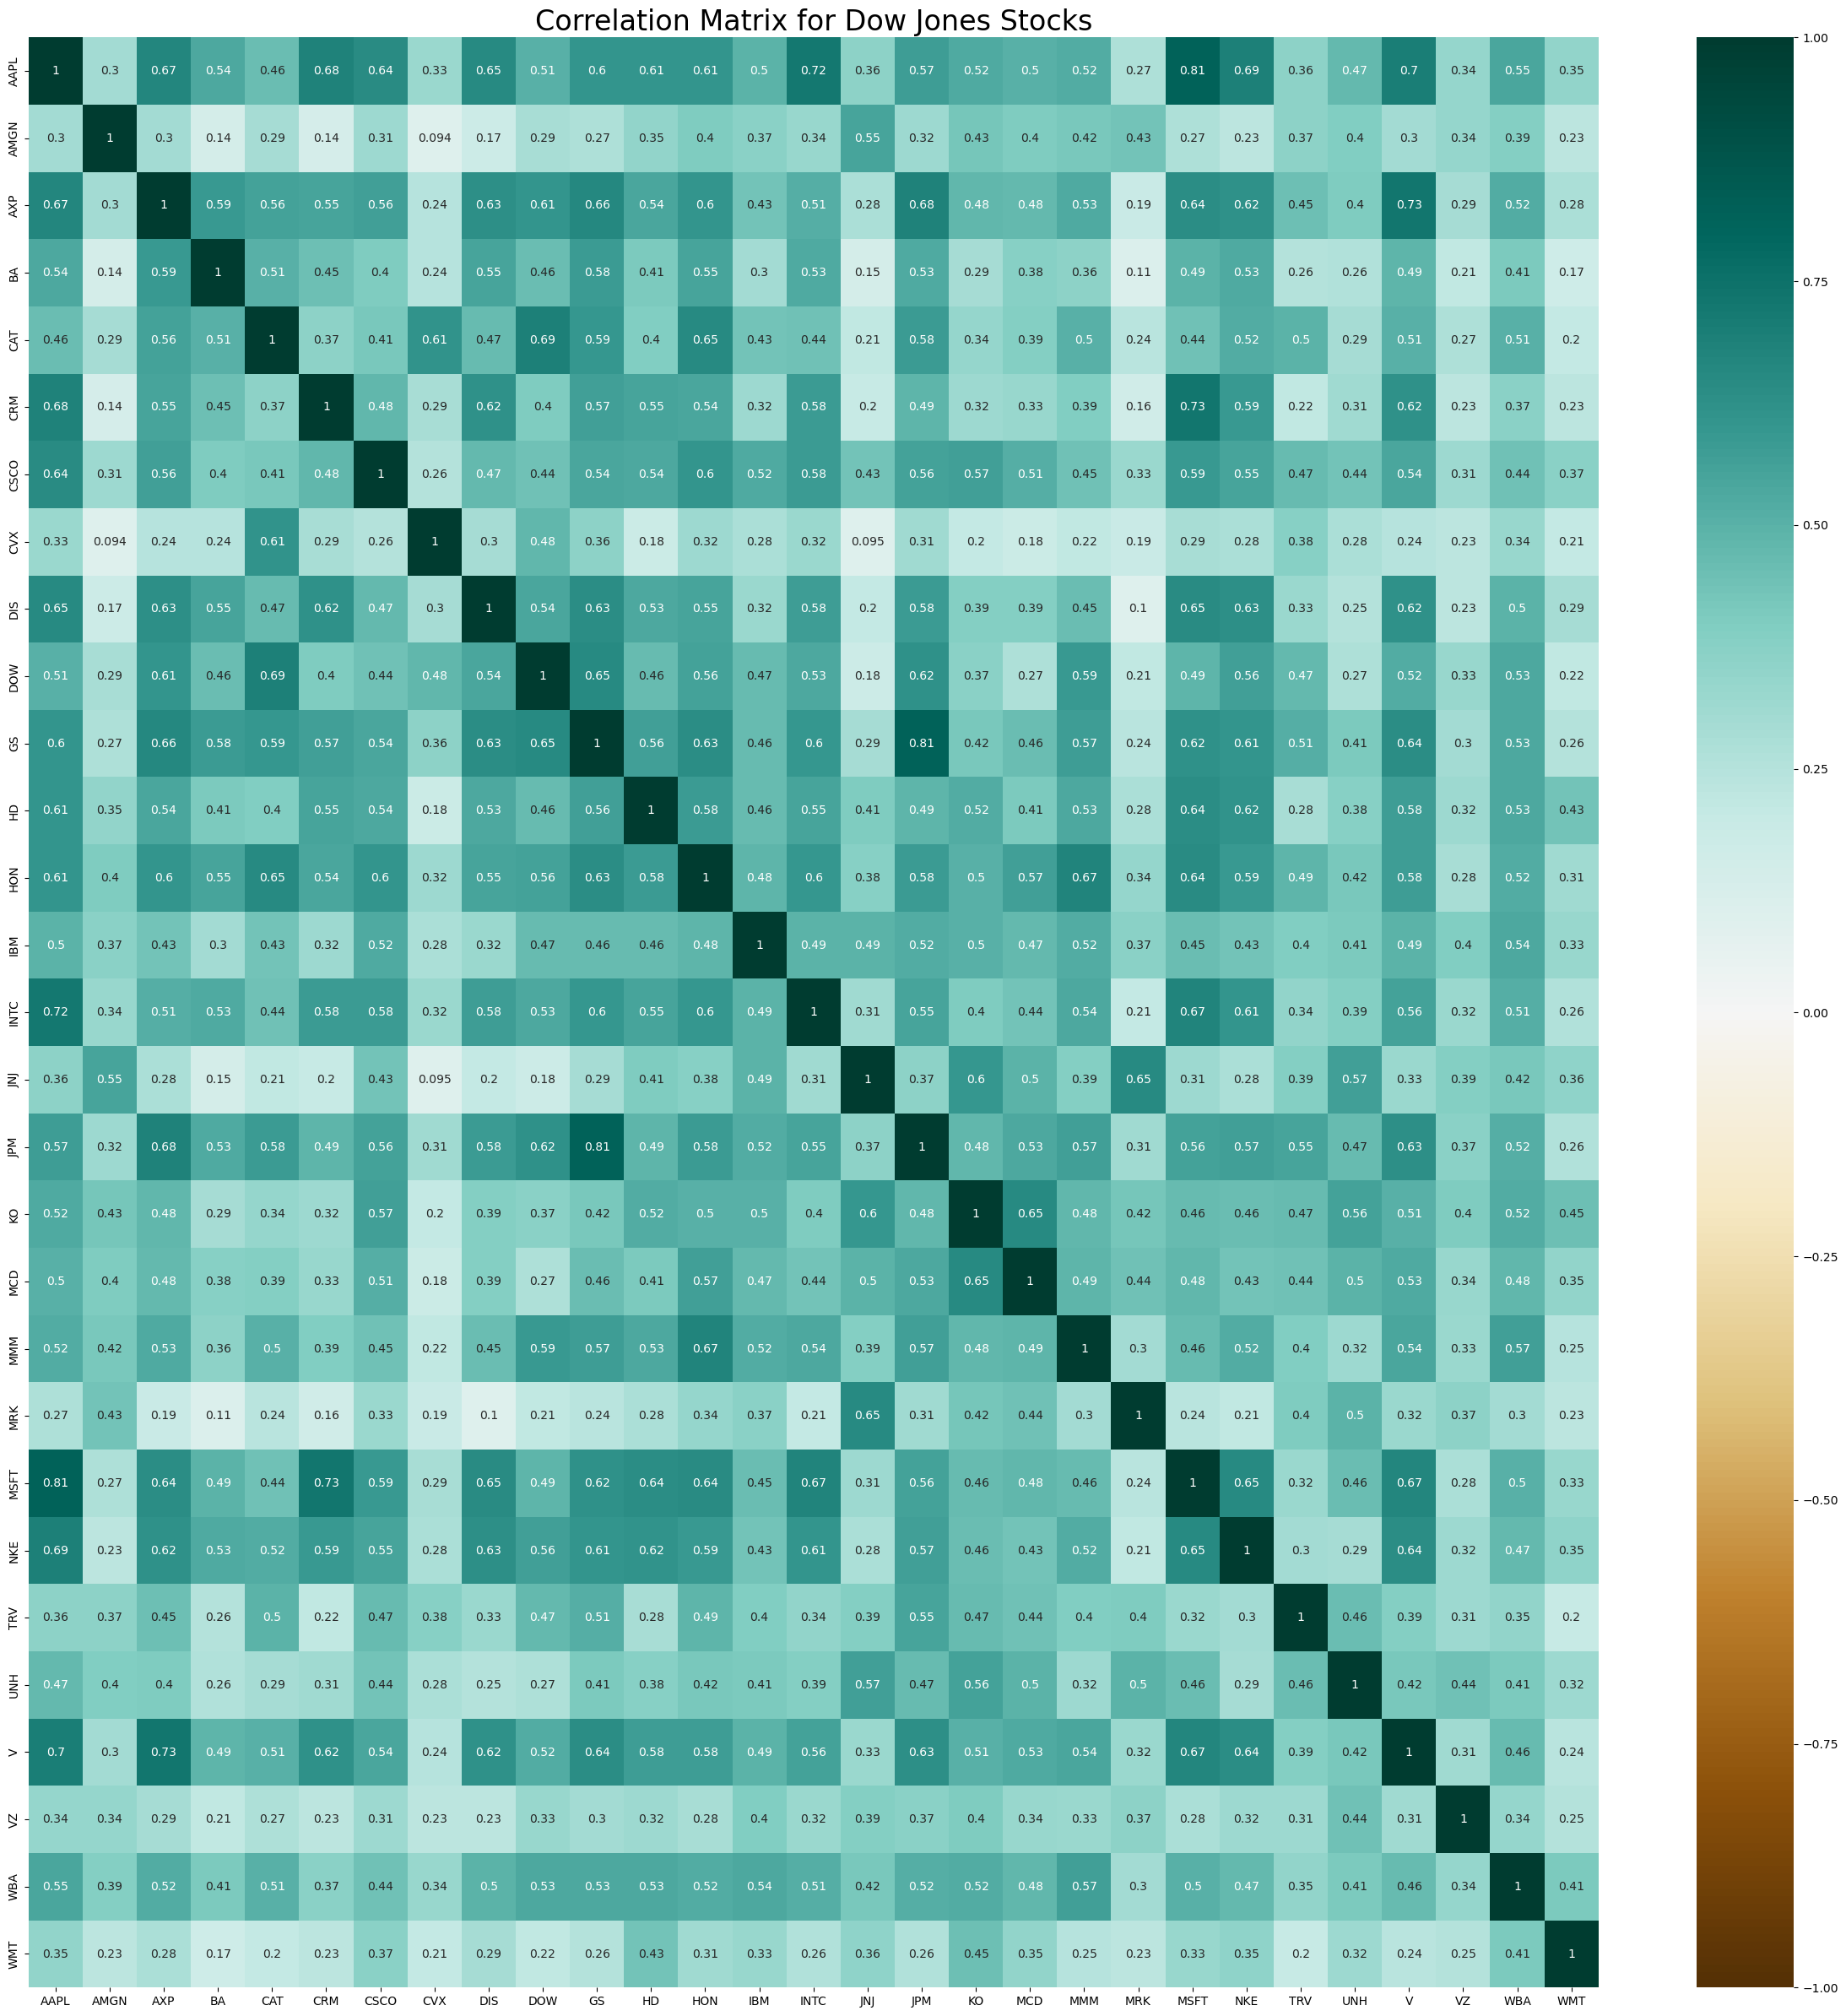

In [10]:
# Displaying the correlation in a heatmap

plt.figure(figsize=(30, 30))
heatmap_corr = sns.heatmap(stock_corr, annot=True, vmin = -1, vmax = 1, cmap="BrBG")
heatmap_corr.set_title("Correlation Matrix for Dow Jones Stocks", fontsize = 24)

# Saving the heatmap
fig = heatmap_corr.get_figure()
fig.savefig("Outputs/correlation_heatmap.png")

In [11]:
# Calculating standard deviations for each stock
stocks_stdev = stock_pct_clean.std()*252**0.5
stocks_stdev

AAPL    0.352779
AMGN    0.219640
AXP     0.360408
BA      0.461399
CAT     0.330139
CRM     0.469826
CSCO    0.292239
CVX     0.333392
DIS     0.370805
DOW     0.301653
GS      0.290930
HD      0.308183
HON     0.255267
IBM     0.235958
INTC    0.386768
JNJ     0.173596
JPM     0.288985
KO      0.200302
MCD     0.201356
MMM     0.284133
MRK     0.202431
MSFT    0.354263
NKE     0.422283
TRV     0.231787
UNH     0.243660
V       0.290985
VZ      0.227427
WBA     0.309043
WMT     0.267686
dtype: float64

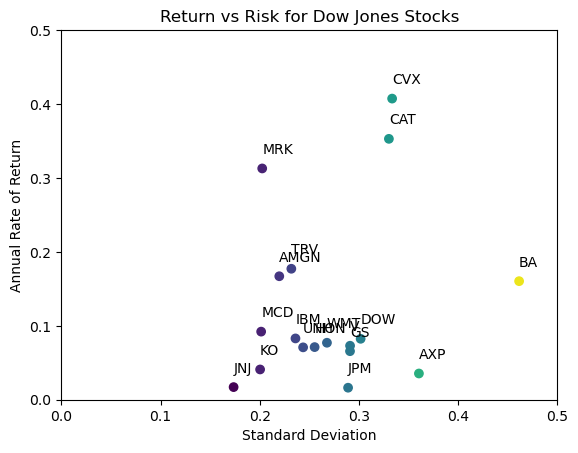

In [12]:
# Plotting the annual returns and the standard deviations (risk) to compare them all

labels_stocks = annual_return_stocks.index.to_list()

plt.scatter(stocks_stdev,annual_return_stocks,c=stocks_stdev)
for i in range(len(annual_return_stocks)):
    plt.annotate(labels_stocks[i], (stocks_stdev[i], annual_return_stocks[i] + 0.02))
plt.xlabel("Standard Deviation")
plt.ylabel("Annual Rate of Return")
plt.title("Return vs Risk for Dow Jones Stocks")
plt.xlim((0, 0.5))
plt.ylim((0, 0.5))

plt.savefig("Outputs/annual_returns_risk_all_stocks.png")
plt.show()


In [13]:
# Selecting the 5 stocks with the highest rate of return

highest_stocks = annual_return_stocks.sort_values(ascending=False).iloc[0:5,]
highest_stocks_index = highest_stocks.index.to_list()
print(highest_stocks_index)

# Extracting the information from all the previous datasets for only these companies

stock_prices_reduced = stock_prices.loc[:,highest_stocks_index[0:5]]
stock_pct_reduced = stock_pct_clean.loc[:,highest_stocks_index[0:5]]

# @NOTE: another way to do it
# stock_prices_reduced = stock_prices[highest_stocks_index[0:3]]

['CVX', 'CAT', 'MRK', 'TRV', 'AMGN']


In [14]:
# Calculating the standard deviation of each one of these stocks
stocks_reduced_stdev = stock_pct_reduced.std()*252**0.5
stocks_reduced_stdev


CVX     0.333392
CAT     0.330139
MRK     0.202431
TRV     0.231787
AMGN    0.219640
dtype: float64

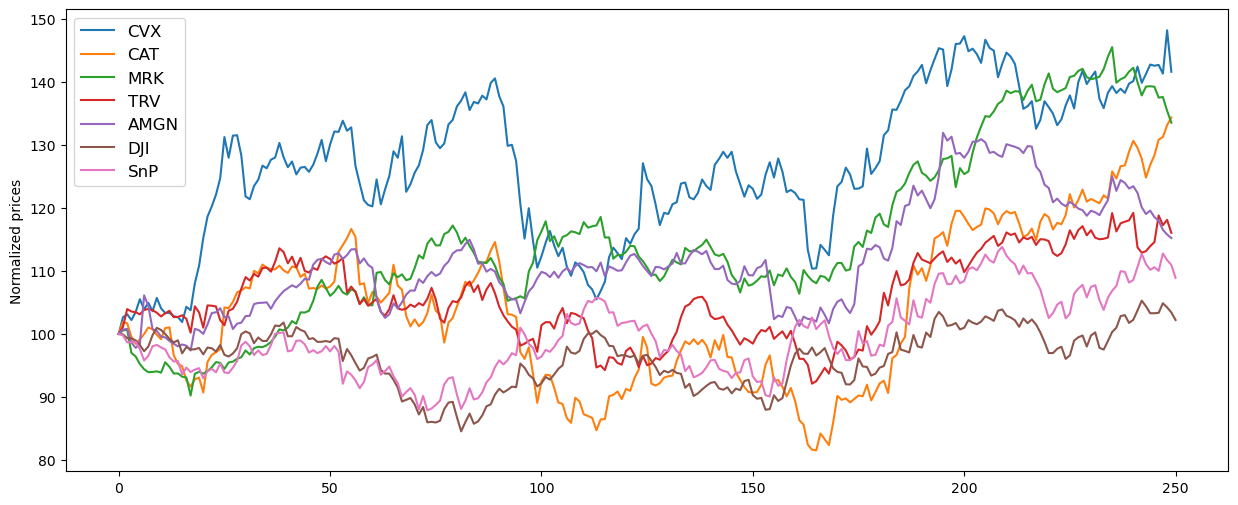

In [15]:
# Fetching the data for Dow Jones and S&P500 and comparing to the 3 tops stocks in Dow Jones
indices = pd.read_csv('Outputs/indices_prices.csv')


# Normalizing values to Jan 27/2022 (100%) and then plotting them together

stock_reduced_normalized = stock_prices_reduced / (stock_prices_reduced.iloc[0]) * 100
indices_normalized = indices / (indices.iloc[0]) * 100

plt.figure(figsize=(15, 6))
for i in range(stock_reduced_normalized.shape[1]):
    plt.plot(stock_reduced_normalized.iloc[:,i], label=stock_reduced_normalized.columns.values[i])
for i in range(indices_normalized.shape[1]):
    plt.plot(indices_normalized.iloc[:,i], label=indices_normalized.columns.values[i])
plt.legend(loc='best', fontsize=12)
plt.ylabel('Normalized prices')

plt.savefig("Outputs/stock_normalized_prices_vs_indices.png")
plt.show()

In [16]:
#Calculate daily percentual change in the value of the indices
indices_pct = indices.pct_change()

#Remove nan values at the first row. Create a new dataframe df
indices_pct_clean = indices_pct.iloc[1:len(indices_pct.index),:]

# Calculate annualized average return for each index. Annualized average return = Daily average return * 252 business days.

annual_return_indices = indices_pct_clean.mean()*252
annual_return_indices.head()

DJI    0.041774
SnP    0.114817
dtype: float64

In [17]:
# Calculating the standard deviation of each one of these indices
indices_stdev = indices_pct_clean.std()*252**0.5
indices_stdev

DJI    0.199760
SnP    0.241846
dtype: float64

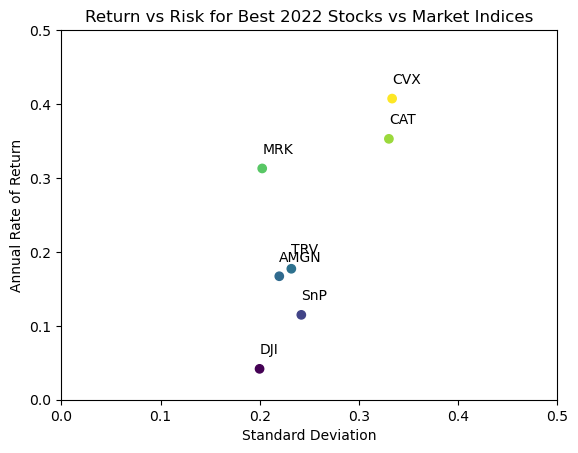

In [18]:
# Plotting the annual returns and the standard deviations (risk) to compare them all

annual_return = pd.concat([highest_stocks,annual_return_indices])
stdev = pd.concat([stocks_reduced_stdev,indices_stdev])
labels = annual_return.index.to_list()
plt.scatter(stdev,annual_return,c=annual_return)
for i in range(len(annual_return)):
    plt.annotate(labels[i], (stdev[i], annual_return[i] + 0.02))
plt.xlabel("Standard Deviation")
plt.ylabel("Annual Rate of Return")
plt.title("Return vs Risk for Best 2022 Stocks vs Market Indices")
plt.xlim((0, 0.5))
plt.ylim((0, 0.5))

plt.savefig("Outputs/stock_returns.png")

plt.show()



Text(0.5, 1.0, 'Correlation Selected stocks')

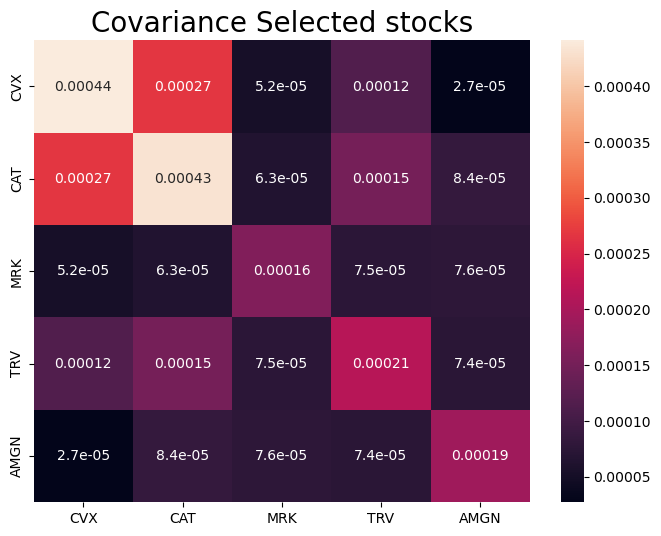

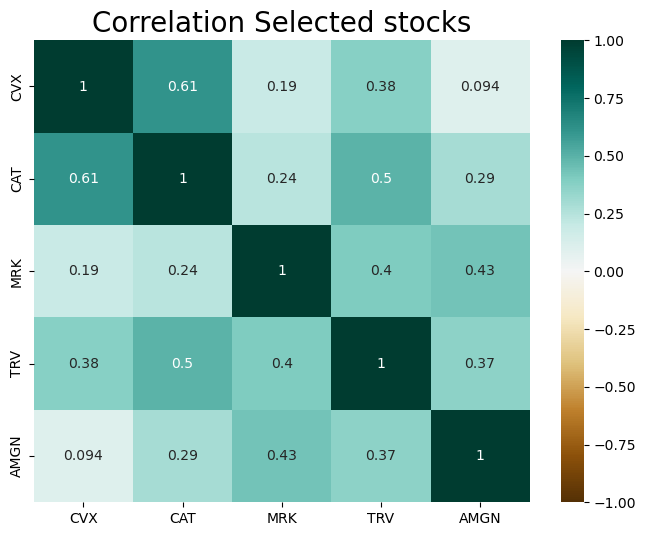

In [28]:
# Calculating covariance and correlation for the top 5 stocks
stock_reduced_covar = stock_pct_reduced.cov()
stock_reduced_corr = stock_pct_reduced.corr()
# Heatmap for covariance matrix

plt.figure(figsize=(8, 6))
heatmap_cov = sns.heatmap(stock_reduced_covar, annot=True)
heatmap_cov.set_title("Covariance Selected stocks", fontsize = 20)

plt.figure(figsize=(8, 6))
heatmap_corr = sns.heatmap(stock_reduced_corr, annot=True, vmin = -1, vmax = 1, cmap="BrBG")
heatmap_corr.set_title("Correlation Selected stocks", fontsize = 20)

In [20]:
# Saving Results for Efficient Frontier calculations

stock_pct_reduced.to_csv("Outputs/stock_pct_reduced.csv", index=False)
indices_pct_clean.to_csv("Outputs/indices_pct_clean.csv", index=False)